<a href="https://colab.research.google.com/github/kapibara3chi/Make_Design_Structure_Matrix/blob/main/DSM_main.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install streamlit
# !pip install pyngrok

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 47.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 82.1/82.1 KB 9.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 75.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 164.8/164.8 KB 16.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 184.3/184.3 KB 16.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 KB 7.2 MB/s eta 0:00:00
  Created wheel for validators: filename=validators-0.20.0-py3-none-any.whl size=19579 sha256=a20d298a0850acd654e52416db712f20534a4ced6810b4b106daa7af5830d3dc
  Stored in directory: /root/.cache/pip/wheels/2d/f0/a8/1094fca7a7e5d0d12ff56e0c64675d72aa5cc81a5fc200e849
Successfully built validators


In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
# from pyngrok import ngrok

# public_url = ngrok.connect(port='80')
# print(public_url)
# print("****")

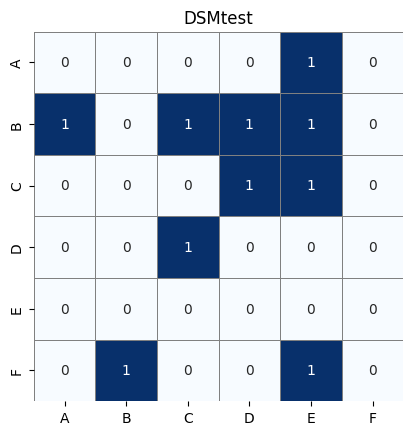

[[1. 0. 0. 0. 0. 0.]
 [1. 1. 0. 0. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 0. 1. 1. 0. 0.]
 [1. 1. 1. 1. 1. 0.]
 [1. 1. 1. 1. 1. 1.]]
[5 1 3 4 2 6]


NameError: ignored

In [7]:
# %%writefile /content/drive/MyDrive/DSM/my_module.py
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
def make_dsm_by_sns(B,values):

  # # データの作成
 # print(df)
  
  # Seabornを使ったヒートマップの作成
  # sns.heatmap(df, annot=True, cmap='Blues', fmt='d', linewidths=0.5, linecolor='grey', square=True)
  
  sns.heatmap(B, annot=True, cbar=False, square=True, cmap="Blues", linewidths=0.5, linecolor="grey",
            xticklabels=values, yticklabels=values)

  plt.title('DSMtest')
  plt.savefig("DSMtest.png",bbox_inches="tight")
  plt.show()

def make_dsm_by_plotly():
  import plotly.graph_objs as go
  import numpy as np
  
  # データの定義
  B = np.array([[0, 1, 0, 0, 0, 1, 0],
                [0, 0, 0, 1, 0, 0, 0],
                [1, 0, 0, 0, 0, 0, 1],
                [0, 0, 0, 0, 1, 0, 0],
                [0, 1, 0, 0, 0, 1, 0],
                [0, 0, 1, 0, 0, 0, 0],
                [1, 0, 0, 0, 1, 0, 0]])
  
  xvalues = ["ElementA", "ElementB", "ElementC", "ElementD", "ElementE", "ElementF", "ElementG"]
  yvalues = ["ElementA", "ElementB", "ElementC", "ElementD", "ElementE", "ElementF", "ElementG"]
  
  # Plotlyのheatmap traceを作成
  heatmap = go.Heatmap(z=B, x=xvalues, y=yvalues, colorscale='Blues', showscale=True, 
                      text=B, hoverinfo='skip', 
                      xgap=1, ygap=1, zmin=0, zmax=1)
  
  # Plotlyのfigureオブジェクトを作成
  fig = go.Figure(data=[heatmap])
  
  # レイアウトの調整
  fig.update_layout(width=600, height=600, xaxis_showgrid=True, yaxis_showgrid=True, 
                    yaxis_autorange='reversed', title='DSMtest')
  
  # ヒートマップの各セルに値を表示する
  for i in range(len(yvalues)):
      for j in range(len(xvalues)):
          fig.add_annotation(x=xvalues[j], y=yvalues[i], text=str(B[i][j]), showarrow=False)
  
  # プロットの表示
  fig.show()

import numpy as np

## convert DSM to ReachableMatrix

def toReachableMatrix(DSM):
    I = eye(DSM.shape[0]) # 単位行列の生成
    calcmax = 1000
    
    for i in range(1, calcmax+1):
        R1 = matrix_power((DSM + I), i)
        Rindex = np.where(R1 > 1)
        R1[Rindex] = ones(len(Rindex[0])) # ブール演算のかわり

        R2 = matrix_power((DSM + I), i+1)
        Rindex = np.where(R2 > 1)
        R2[Rindex] = ones(len(Rindex[0])) # ブール演算のかわり

        if np.array_equal(R1, R2):
            break
    return R1

## order Reachable matrix for sequencing
def OrderReachable(Reachable):
    original = np.copy(Reachable)
    DSMsize = Reachable.shape[0]
    valuesDSM = np.arange(1, DSMsize+1)
    count = 0
    level = np.zeros(DSMsize, dtype=int)

    while count < DSMsize:
        R = Reachable
        A = Reachable.T
        RA = R * A
        RAsize = RA.shape[0]
        elements = np.arange(1, RAsize+1)

        for i in range(RAsize):
            if np.array_equal(RA[i], R[i]):
                count += 1
                level[count-1] = valuesDSM[i]
                elements[i] = 0

        elements = elements[elements > 0]
        Reachable = Reachable[np.ix_(elements-1, elements-1)]
        valuesDSM = valuesDSM[elements-1]

    orderedReachable = original[np.ix_(level-1, level-1)]

    return orderedReachable, level

## sequencing DSM
def Sequencing(DSM, label):
    cDSM = np.copy(DSM)
    clabel = label.copy()

    Reachable = toReachableMatrix(cDSM)

    OrderedReachable, level = OrderReachable(Reachable)
    print(OrderedReachable)
    print(level)

    # SequencedDSM = cDSM[np.ix_(level-1, level-1)]
    # Sequencedlabel = [clabel[i] for i in level-1]
    # ラベルを基準にDSMを並び替える
    idx = np.argsort(label)
    DSM = DSM[:, idx][idx, :]
    
    # SequencedDSMを作成する
    SequencedDSM = np.zeros_like(DSM)
    for i in range(len(label)):
        for j in range(len(label)):
            if DSM[i,j] == 1:
                SequencedDSM[i,j] = j+1




    return SequencedDSM, Sequencedlabel

# DSM = np.array([[0, 1, 0, 0, 0, 1, 0],
#                 [0, 0, 0, 1, 0, 0, 0],
#                 [1, 0, 0, 0, 0, 0, 1],
#                 [0, 0, 0, 0, 1, 0, 0],
#                 [0, 1, 0, 0, 0, 1, 0],
#                 [0, 0, 1, 0, 0, 0, 0],
#                 [1, 0, 0, 0, 1, 0, 0]])

# label = ["A", "B", "C", "D", "E", "F", "G"]

# SequencedDSM, Sequencedlabel = Sequencing(DSM, label)
# print("Sequenced DSM:\n", SequencedDSM)
# print("Sequenced label:\n", Sequencedlabel)


if __name__ == '__main__':

  # データの作成
  DSM = np.array([[0, 0, 0, 0, 1, 0],
                  [1, 0, 1, 1, 1, 0],
                  [0, 0, 0, 1, 1, 0],
                  [0, 0, 1, 0, 0, 0],
                  [0, 0, 0, 0, 0, 0],
                  [0, 1, 0, 0, 1, 0]])
  
  label = ["A", "B", "C", "D", "E", "F"]
  
  make_dsm_by_sns(DSM,label)

  SequencedDSM, Sequencedlabel = Sequencing(DSM, label)
  print("Sequenced DSM:\n", SequencedDSM)
  print("Sequenced label:\n", Sequencedlabel)
  # df = pd.DataFrame(data=B, columns=value_l,index=value_l)


In [ ]:
# !streamlit run --server.port 80 /content/drive/MyDrive/DSM/my_script.py >/dev/null &

In [ ]:
%%writefile /content/drive/MyDrive/DSM/app.py
import sys
sys.path.append('/content/drive/MyDrive/DSM')
import streamlit as st
import my_module
txt=my_module.test()
st.title(txt)

# simple_streamlit_app.py

import numpy as np
import pandas as pd
import streamlit as st
df = pd.DataFrame( np.random.randn(10, 4), columns=['a2', 'b2', 'c','d'] )
st.title("Simple Streamlit App")
 
st.dataframe(df) 
st.write("📈　Line-Chart")
st.line_chart(df)
 
if st.checkbox('👓 Show DataFrame (with highlight_max)'):
 st.table(df.style.highlight_max(axis=0))


Overwriting /content/drive/MyDrive/DSM/app.py


In [4]:
import numpy as np

def toReachableMatrix(DSM):
    n = DSM.shape[0]
    I = np.identity(n, dtype=int)
    R1 = np.zeros((n,n), dtype=int)

    for i in range(1, n+1):
        R1_new = (DSM + I)**i
        R1_new[R1_new > 1] = 1
        if (R1_new == R1).all():
            break
        R1 = R1_new
    
    return R1

DSM = np.array([[0, 0, 0, 0, 1, 0],
                [1, 0, 1, 1, 1, 0],
                [0, 0, 0, 1, 1, 0],
                [0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 0],
                [0, 1, 0, 0, 1, 0]])

ReachableMatrix = toReachableMatrix(DSM)

print(ReachableMatrix)


[[1 0 0 0 1 0]
 [1 1 1 1 1 0]
 [0 0 1 1 1 0]
 [0 0 1 1 0 0]
 [0 0 0 0 1 0]
 [0 1 0 0 1 1]]


In [6]:
from numpy import zeros, ones, eye
from numpy.linalg import matrix_power
import numpy as np

def calcReachableMatrix(DSM):
    I = eye(DSM.shape[0]) # 単位行列の生成
    calcmax = 1000
    
    for i in range(1, calcmax+1):
        R1 = matrix_power((DSM + I), i)
        Rindex = np.where(R1 > 1)
        R1[Rindex] = ones(len(Rindex[0])) # ブール演算のかわり

        R2 = matrix_power((DSM + I), i+1)
        Rindex = np.where(R2 > 1)
        R2[Rindex] = ones(len(Rindex[0])) # ブール演算のかわり

        if np.array_equal(R1, R2):
            break
            
    return R1

DSM = np.array([[0, 0, 0, 0, 1, 0], [1, 0, 1, 1, 1, 0], [0, 0, 0, 1, 1, 0], 
                [0, 0, 1, 0, 0, 0], [0, 0, 0, 0, 0, 0], [0, 1, 0, 0, 1, 0]]) # DSMの定義

Reachablematrix = calcReachableMatrix(DSM)
print(Reachablematrix)


[[1. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 1. 1. 1. 0.]
 [0. 0. 0. 0. 1. 0.]
 [1. 1. 1. 1. 1. 1.]]


In [ ]:
# from google.colab import files
# files.view("/content/drive/MyDrive")
# files.view("my_script.py")

In [ ]:
# !streamlit run /content/drive/MyDrive/DSM/my_script.py & sleep 3 && npx localtunnel --port 8501
!streamlit run /content/drive/MyDrive/DSM/app.py & sleep 3 && npx localtunnel --port 8501




  You can now view your Streamlit app in your browser.

  Network URL: http://172.28.0.12:8501
  External URL: http://34.172.69.88:8501

npx: installed 22 in 2.286s
your url is: https://young-towns-lie-34-172-69-88.loca.lt
  Stopping...
^C
